In [114]:
# Steps. The data is loaded so it needs to be put in a form to be entered into the input layer
# First layer would be a single image flattened out
# Four layers of convolution network with 3x3 filters
# In between you need some extra stuff (TODO what)
# output layer should be classification
# Once the model is built train on the training
# data is 28x28 pixel data 0 to 255 (unit8)

In [2]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

from tensorflow.keras import layers, models, optimizers, utils, datasets
from notebooks.utils import display

2024-01-02 05:53:00.010574: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-02 05:53:00.405849: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-02 05:53:00.405919: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-01-02 05:53:00.439103: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-02 05:53:01.622192: W tensorflow/stream_executor/platform/de

In [ ]:
# to get the data set download from https://www.kaggle.com/datasets/hojjatk/mnist-dataset into ./data/mnistdigits

In [1]:
NUM_CLASSES=10

In [3]:
input_path = '../../data/mnistdigits'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

In [4]:
from notebooks.mnistdigitsutils import ( MnistDataloader ) 

In [5]:
data_loader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath,)
(x_train, y_train),(x_test, y_test) = data_loader.load_data()

In [6]:
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)

In [7]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [8]:
# convert the output to one hot encoding. 
y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

In [9]:
x_train[43001].shape


(28, 28)

In [22]:
x_train[43001][1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
y_train[2].shape



(10,)

In [ ]:
# now the test and train images are normalized

In [10]:
def show_images(images, title_texts):
    cols = 3
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap='Greys')
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

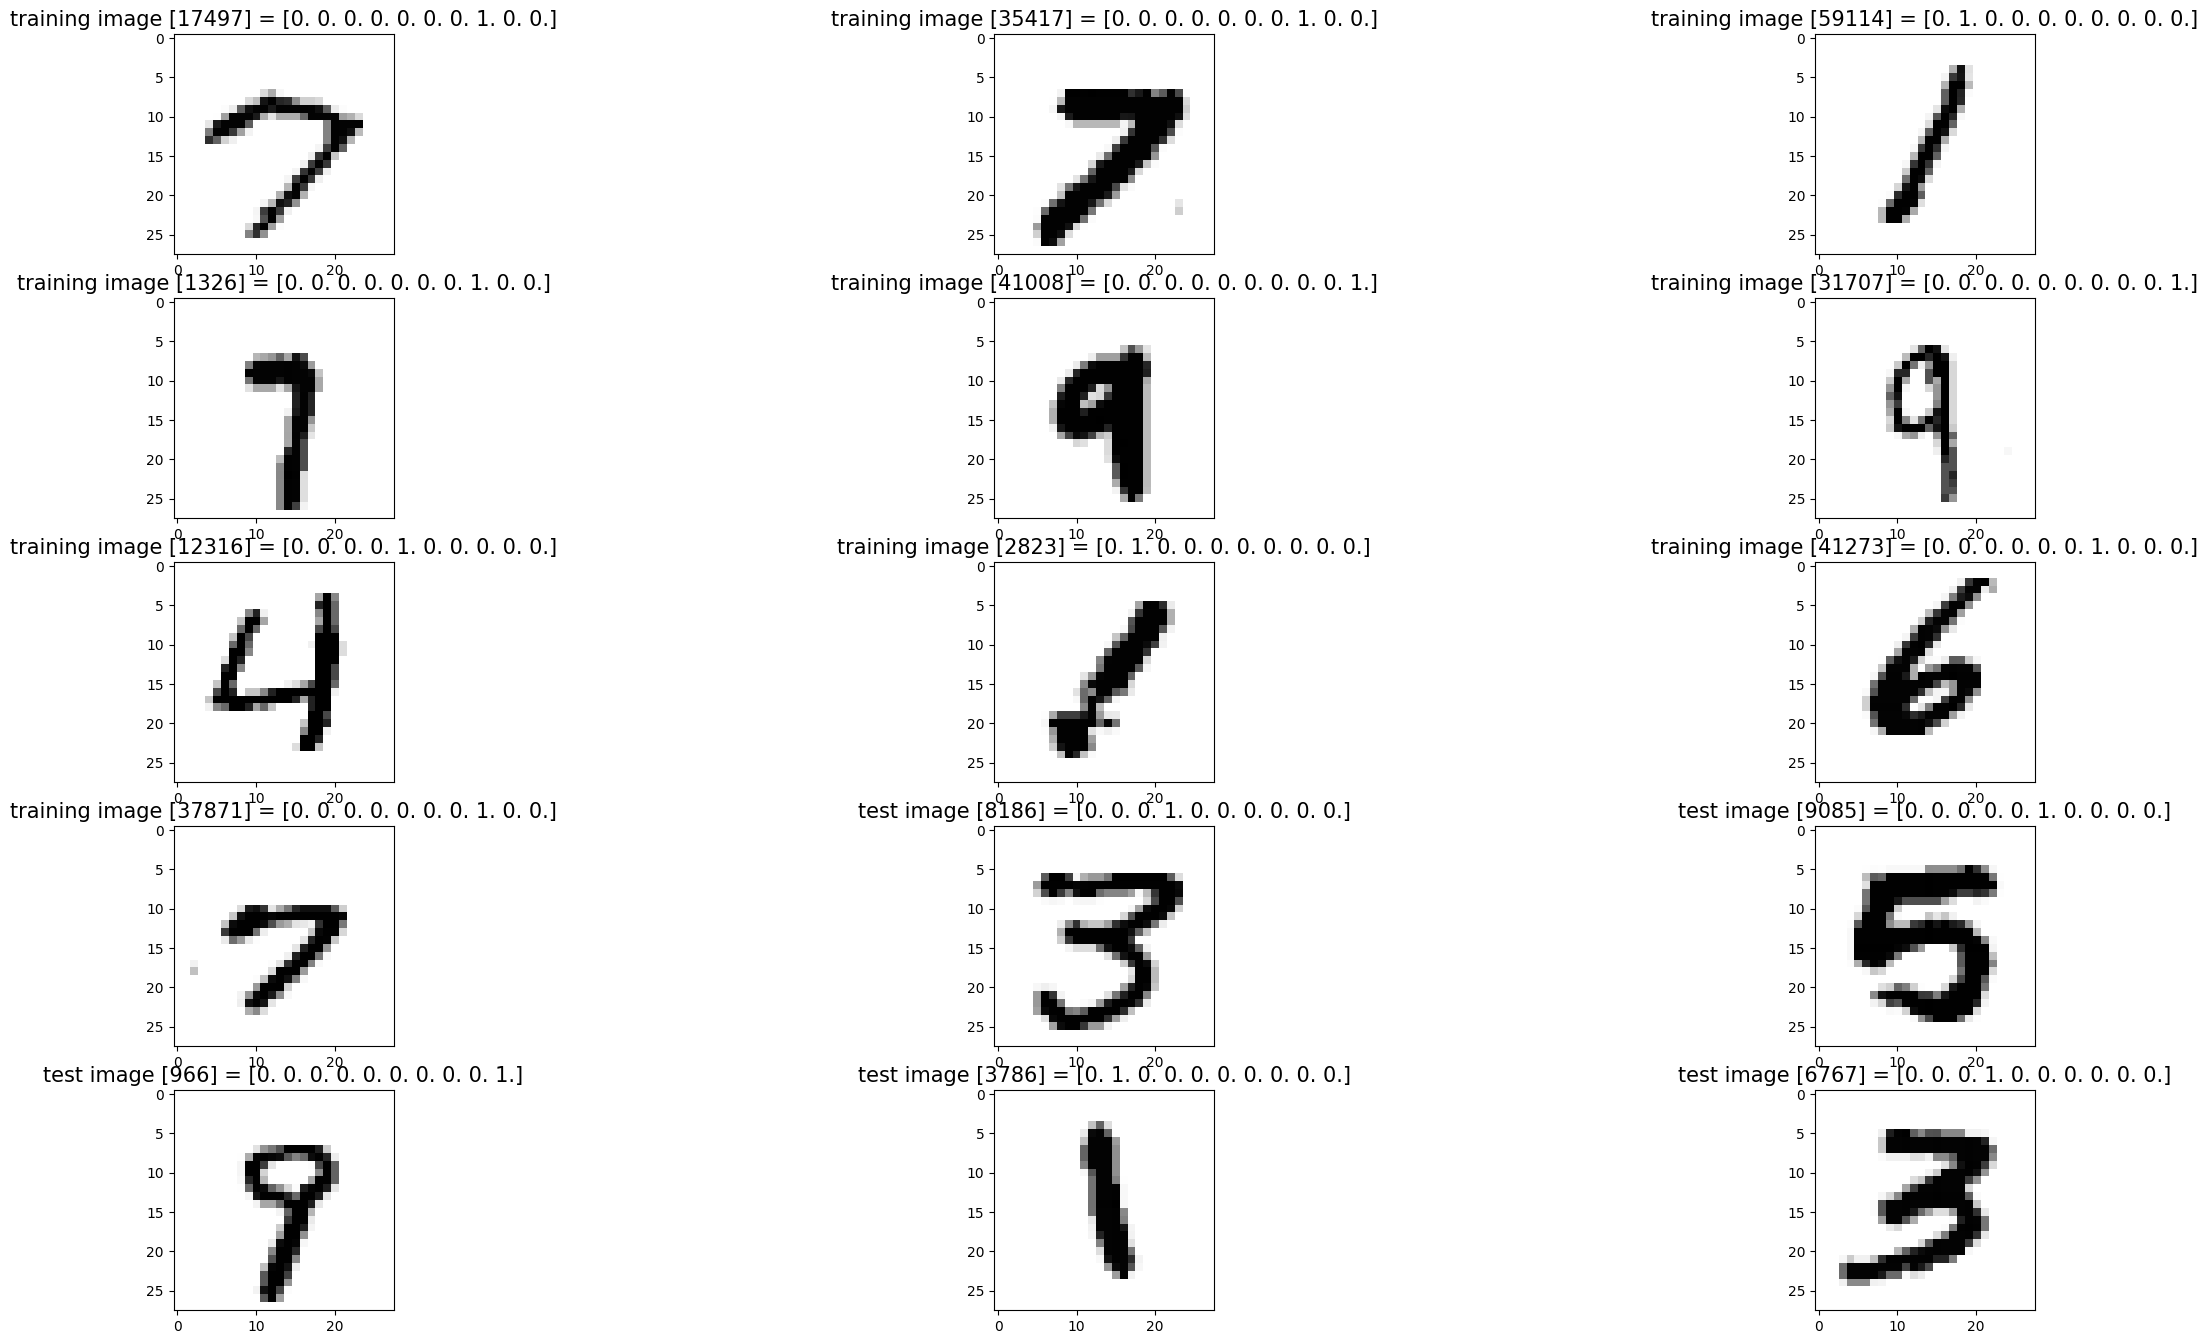

In [11]:
#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [13]:
input_layer = layers.Input((28, 28, 1))

x = layers.Conv2D(filters=28, kernel_size=3, strides=1, padding="same")(
    input_layer
)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=28, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=56, kernel_size=3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=56, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Dropout(rate=0.2)(x)

x = layers.Dense(NUM_CLASSES)(x)
output_layer = layers.Activation("softmax")(x)

model = models.Model(input_layer, output_layer)

2024-01-02 05:53:45.875256: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-01-02 05:53:45.876025: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-01-02 05:53:45.876124: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (58344b06345d): /proc/driver/nvidia/version does not exist
2024-01-02 05:53:45.877848: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 28)       112       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 28)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 28)        7084      
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 28)       112       
 hNormalization)                                             

In [15]:
# Define the optimizer
opt = optimizers.Adam(learning_rate=0.001)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [16]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test))

Epoch 1/10


2024-01-02 05:54:06.392463: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 60s 31ms/step - loss: 0.1303 - accuracy: 0.9604 - val_loss: 0.0628 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0601 - accuracy: 0.9816 - val_loss: 0.0666 - val_accuracy: 0.9781
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0511 - accuracy: 0.9837 - val_loss: 0.0569 - val_accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0413 - accuracy: 0.9867 - val_loss: 0.0326 - val_accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0348 - val_accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0331 - accuracy: 0.9890 - val_loss: 0.0452 - val_accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0299 - accuracy: 0.9902 - val_loss: 0.0279 - val_accura

In [ ]:
# Now we have a trained model lets evaluate on the test set

In [17]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 139ms/step - loss: 0.0256 - accuracy: 0.9925


[0.025561003014445305, 0.9925000071525574]

In [ ]:
# Let's predict the whole test set and we can view some of them

In [18]:
preds = model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [26]:
p1 = model.predict(x_test[0])

NameError: name 'model' is not defined

In [ ]:
# note that y_test is an array of one hot encoded digit classes and preds is an array of the 10 probabilities of x being that class

In [19]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [20]:
preds.shape

(10000, 10)

In [24]:
preds[0]

array([1.1004657e-11, 1.6820138e-09, 2.0535502e-07, 1.8225775e-08,
       1.6566930e-11, 5.5927606e-12, 7.6230302e-14, 9.9999970e-01,
       2.4892513e-10, 4.3742441e-09], dtype=float32)

In [21]:
preds_single = np.argmax(preds, axis=-1)
actual_single = np.argmax(y_test, axis=-1)

In [ ]:
# Show 10 predictions and actuals

In [49]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

In [50]:
output = []
for i, idx in enumerate(indices):
    output.append([i,idx,preds_single[idx],actual_single[idx]])  
output

[[0, 5333, 9, 9],
 [1, 7169, 4, 4],
 [2, 9776, 6, 6],
 [3, 79, 7, 7],
 [4, 9938, 6, 6],
 [5, 8701, 3, 3],
 [6, 7025, 9, 9],
 [7, 2495, 2, 2],
 [8, 4452, 8, 8],
 [9, 162, 5, 5]]

In [ ]:
# Save the model

In [ ]:
model.save("../../data/mnistdigits/digitsmodel.keras", overwrite=True, save_format="keras")